In [12]:
import pandas as pd
import numpy as np

In [2]:
path = """/Users/admin/Documents/Projects/wafer_fault_detection_1/code/diabetes.csv"""
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
null_counts = df.isna().sum()

In [4]:
null_counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
type(null_counts)

pandas.core.series.Series

In [6]:
for i in null_counts:
    print(i)

0
0
0
0
0
0
0
0
0


In [7]:
df_with_null = pd.DataFrame()

In [8]:
df_with_null

""


In [9]:
df_with_null['columns'] = df.columns

In [10]:
df_with_null

,columns
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,BMI
6,DiabetesPedigreeFunction
7,Age
8,Outcome


In [14]:
df_with_null['missing values count'] = np.asarray(df.isna().sum())

In [15]:
df_with_null

,columns,missing values count
0,Pregnancies,0
1,Glucose,0
2,BloodPressure,0
3,SkinThickness,0
4,Insulin,0
5,BMI,0
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,0


In [16]:
null_counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
dfnew = null_counts.to_frame(name="Null counts")

In [27]:
dfnew

,Null counts
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [28]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)
df

,A,B,C
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,3.0,3
3,4.0,NaN,4
4,5.0,5.0,5


In [29]:
from sklearn.impute import KNNImputer

In [30]:
knn_imputer = KNNImputer(missing_values=np.nan,)

In [35]:
df_new = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df_new

,A,B,C
0,1.0,3.333333,1.0
1,2.0,2.000000,2.0
2,3.0,3.000000,3.0
3,4.0,3.333333,4.0
4,5.0,5.000000,5.0


In [52]:
import pandas as pd

class MyClass:
    def __init__(self):
        # self.df = pd.DataFrame({'A': [1, 2, 3]})
        pass

    def method1(self):
        # Modify self.df in method1
        data = {
            'A': [1, 2, np.nan, 4, 5],
            'B': [np.nan, 2, 3, np.nan, 5],
            'C': [1, 2, 3, 4, 5]
        }

        df = pd.DataFrame(data)
        self.df = df

    def method2(self):
#         data = {
#             'A': [10, 11, 12],
#             'B': [13, 14, 15],
#             'C': [1, 2, 3]
#         }

#         df = pd.DataFrame(data)
#         self.df = df
        self.df['A'] = "new"
        return self.df

In [53]:
obj = MyClass()

In [54]:
df = obj.method2()
df.head()

AttributeError: 'MyClass' object has no attribute 'df'

In [55]:
df

,A
0,new
1,new
2,new


In [56]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)
df

,A,B,C
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,3.0,3
3,4.0,NaN,4
4,5.0,5.0,5


In [60]:
df_describe = df.describe()

In [67]:
df_describe['A']['std']

1.8257418583505538

In [68]:
df

,A,B,C
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,3.0,3
3,4.0,NaN,4
4,5.0,5.0,5


In [69]:
path = """/Users/admin/Documents/Projects/wafer_fault_detection_1/code/diabetes.csv"""
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
from sklearn.cluster import KMeans

In [74]:
no_of_clusters = 5

kmeans = KMeans(n_clusters=no_of_clusters,
               init="k-means++",
               random_state=42)

In [75]:
kmeans.fit_predict(df)

array([0, 0, 0, 4, 2, 0, 4, 0, 3, 0, 0, 0, 0, 3, 2, 0, 2, 0, 4, 4, 2, 0,
       0, 0, 2, 4, 0, 2, 4, 0, 0, 1, 4, 0, 0, 2, 0, 0, 0, 2, 4, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 1, 4, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 4, 4, 4, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4,
       4, 0, 0, 2, 4, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0, 4, 0, 2, 0, 2, 0, 4,
       2, 3, 4, 0, 2, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 2, 4, 2, 0, 2, 0,
       2, 0, 4, 2, 4, 4, 0, 1, 0, 0, 4, 0, 1, 0, 0, 4, 0, 0, 2, 0, 2, 3,
       0, 0, 4, 2, 4, 2, 0, 4, 1, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 4, 4, 2,
       0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 3, 4, 4, 2, 0, 4, 0, 0, 0, 2, 0, 4,
       4, 1, 0, 0, 0, 4, 2, 0, 1, 0, 4, 0, 0, 0, 0, 2, 2, 1, 2, 4, 0, 0,
       3, 0, 0, 2, 4, 0, 0, 0, 3, 4, 0, 1, 4, 0, 4, 0, 2, 0, 0, 0, 0, 4,
       0, 2, 2, 0, 0, 3, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 2, 2, 0, 0, 2,
       3, 2, 4, 4, 4, 4, 2, 2, 0, 2, 1, 2, 2, 0, 0,

In [7]:
import sqlite3
import os

In [2]:
path = '/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Database/'
good_file_path = '/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Raw_Files_Validated/Good_Raw'
bad_file_path = '/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Raw_Files_Validated/Bad_Raw'

In [3]:
db_name = "mydb"

In [4]:
path + db_name + '.db'

'/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Database/mydb.db'

In [12]:
conn = sqlite3.connect(path + db_name + '.db')

In [13]:
conn

In [14]:
onlyfiles = [file for file in os.listdir(good_file_path)]
onlyfiles

['data.csv']

In [15]:
import csv

In [20]:
my_cursor = conn.cursor()
command = """SELECT name FROM sqlite_master WHERE type='table' AND name='Good_Raw_Data'"""
my_cursor.execute(command)
my_cursor.fetchall()

[]

In [22]:
column_names = {
    'col1': "int(20)",
    "col2": "varchar(25)",
    "col3": "float(20)",
    "col10": "int(25)",
    "col20": "varchar(30)",
    "col30": "float(30)"
}

In [24]:
for key in column_names.keys():
    col_type = column_names[key]
    try:
        # if the table already exists, then add the column
        conn.execute('ALTER TABLE Good_Raw_Data ADD COLUMN "{column_name}" {data_type}'.format(column_name=key, data_type=col_type))
    except:
        # the table doesn't exists. So create table
        conn.execute('CREATE TABLE Good_Raw_Data ({column_name} {data_type})'.format(column_name=key, data_type=col_type))

In [25]:
my_cursor = conn.cursor()
command = """SELECT name FROM sqlite_master WHERE type='table' AND name='Good_Raw_Data'"""
my_cursor.execute(command)
my_cursor.fetchall()

[('Good_Raw_Data',)]

In [114]:
my_cursor.close()

In [43]:
for file in onlyfiles:
    try:
        complete_path = os.path.join(good_file_path, file)
        with open(complete_path, "r") as f:
            next(f)
            reader = csv.reader(f, delimiter='\n')
            for line in enumerate(reader):
                try:
                    command = 'INSERT INTO Good_Raw_Data values ({values})'.format(values=(line[1][0]))
                    conn.execute(command)
                    print("success")
                except Exception as e:
                    print(e)
    except Exception as e:
        pass


no such column: hi
no such column: ji


In [46]:
my_cursor.execute("PRAGMA table_info(Good_Raw_Data)")
columns = [column[1] for column in my_cursor.fetchall()]
columns

['col1', 'col2', 'col3', 'col10', 'col20', 'col30']

In [49]:
', '.join(['?']*len(columns))

'?, ?, ?, ?, ?, ?'

In [48]:
insert_query = f"INSERT INTO Good_Raw_Data ({', '.join(columns)}) VALUES ({', '.join(['?']*len(columns))})"


In [55]:
for file in onlyfiles:
    try:
        complete_path = os.path.join(good_file_path, file)
        with open(complete_path, "r") as f:
            next(f)
            reader = csv.reader(f, delimiter='\n')
            for line in enumerate(reader):
                try:
                    list_ = line[1][0].split(',')
                    insert_query = f"INSERT INTO Good_Raw_Data ({', '.join(columns)}) VALUES ({', '.join(['?']*len(columns))})"
                    conn.execute(insert_query, list_)
                    print("success")
                except Exception as e:
                    print(e)
    except Exception as e:
        pass


success
success


In [56]:
my_cursor.description

(('cid', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('type', None, None, None, None, None, None),
 ('notnull', None, None, None, None, None, None),
 ('dflt_value', None, None, None, None, None, None),
 ('pk', None, None, None, None, None, None))

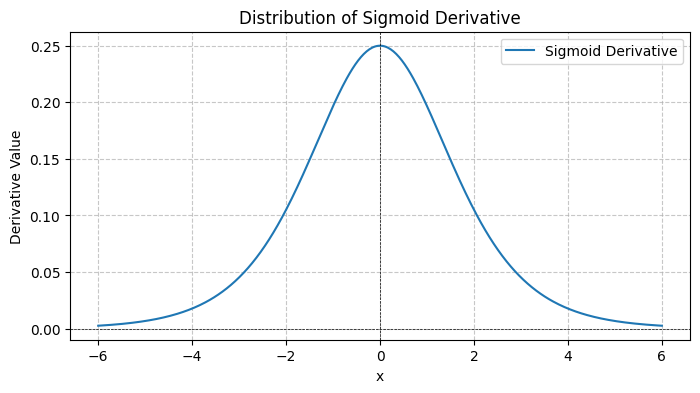

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate a range of x values
x = np.linspace(-6, 6, 400)

# Calculate the derivative of the sigmoid function for each x value
derivative = sigmoid_derivative(x)

# Create a plot
plt.figure(figsize=(8, 4))
plt.plot(x, derivative, label="Sigmoid Derivative")
plt.xlabel("x")
plt.ylabel("Derivative Value")
plt.title("Distribution of Sigmoid Derivative")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


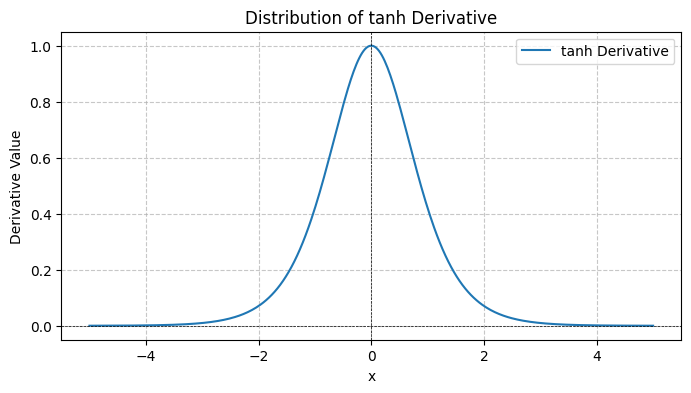

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tanh function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Generate a range of x values
x = np.linspace(-5, 5, 400)

# Calculate the derivative of the tanh function for each x value
derivative = tanh_derivative(x)

# Create a plot
plt.figure(figsize=(8, 4))
plt.plot(x, derivative, label="tanh Derivative")
plt.xlabel("x")
plt.ylabel("Derivative Value")
plt.title("Distribution of tanh Derivative")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


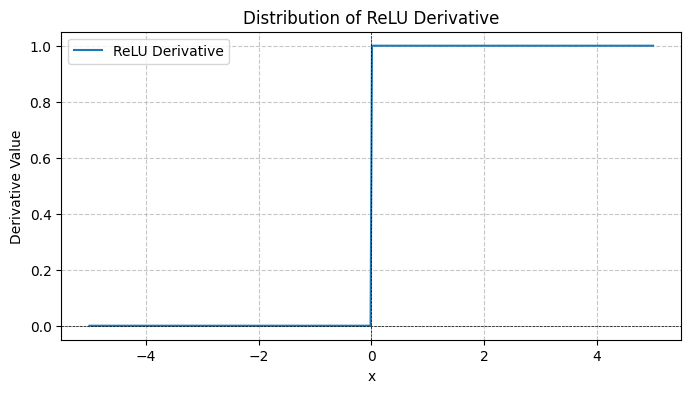

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Generate a range of x values
x = np.linspace(-5, 5, 400)

# Calculate the derivative of the ReLU function for each x value
derivative = relu_derivative(x)

# Create a plot
plt.figure(figsize=(8, 4))
plt.plot(x, derivative, label="ReLU Derivative")
plt.xlabel("x")
plt.ylabel("Derivative Value")
plt.title("Distribution of ReLU Derivative")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
std_scaler = StandardScaler()

In [62]:
min_max_scaler = MinMaxScaler()

In [69]:
X = np.linspace(1, 100, num=50)
X = np.reshape(X, (X.shape[0], 1))
X.shape

(50, 1)

In [70]:
X_std_scaled = std_scaler.fit_transform(X)

In [73]:
np.mean(X_std_scaled)

7.549516567451065e-17

In [74]:
np.std(X_std_scaled)

0.9999999999999999

In [75]:
X_min_max_scaled = min_max_scaler.fit_transform(X)

In [77]:
np.mean(X_min_max_scaled)

0.5000000000000001

In [78]:
np.std(X_min_max_scaled)

0.29450754468697576

In [79]:
new_min_max_scaler = MinMaxScaler(feature_range=(10, 20))

In [80]:
X_new_min_max_scaled = new_min_max_scaler.fit_transform(X)

In [81]:
np.mean(X_new_min_max_scaled)

15.0

In [82]:
np.std(X_new_min_max_scaled)

2.9450754468697573

In [5]:
import os
import pandas as pd

In [2]:
os.getcwd()

'/Users/admin/Documents/Projects/wafer_fault_detection_1/notebooks'

In [3]:
path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Raw_Files_Validated/Good_Raw/"

In [4]:
os.listdir(path)

['wafer_07012020_041011.csv', 'wafer_13012020_090817.csv']

In [22]:
file_path = os.path.join(path, "wafer_07012020_041011.csv")
df = pd.read_csv(file_path)

In [27]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100,110.1900,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1
1,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100,109.7611,0.1210,1.5527,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1
2,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.4588,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1
3,Wafer-504,2997.28,2357.99,2141.0667,1236.5212,0.9698,100,98.3344,0.1238,1.5973,...,NaN,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,-1
4,Wafer-505,3025.10,2475.18,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.5525,...,NaN,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,-1


In [26]:
df.columns[0] == 'Unnamed: 0'

True

In [8]:
df.shape

(100, 592)

In [9]:
df = df.drop(df.columns[-1], axis=1)

In [11]:
df.to_csv(os.path.join(path, "wafer_07012021_041011.csv"), index=False)

In [12]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with NaN values
data = {'A': [1, 2, np.nan, 4],
        'B': [np.nan, np.nan, np.nan, np.nan],
        'C': [1, 2, 3, 4]}

df = pd.DataFrame(data)

# Check if all values in each column are NaN
all_nan_columns = df.isna().all()

# The result is a Series with True for columns where all values are NaN, and False otherwise
print(all_nan_columns)


A    False
B     True
C    False
dtype: bool


In [21]:
list(all_nan_columns[all_nan_columns.values == True].index)

['B']

In [15]:
data[all_nan_columns.values==True]

TypeError: unhashable type: 'numpy.ndarray'

In [28]:
# Check if all values in each column are NaN
all_nan_columns = df.isna().all()

# The result is a Series with True for columns where all values are NaN, and False otherwise
print(all_nan_columns)

Unnamed: 0    False
Sensor-1      False
Sensor-2      False
Sensor-3      False
Sensor-4      False
              ...  
Sensor-587    False
Sensor-588    False
Sensor-589    False
Sensor-590    False
Good/Bad      False
Length: 592, dtype: bool


In [29]:
list(all_nan_columns[all_nan_columns.values == True].index)

['Sensor-86',
 'Sensor-110',
 'Sensor-111',
 'Sensor-112',
 'Sensor-221',
 'Sensor-245',
 'Sensor-246',
 'Sensor-247',
 'Sensor-359',
 'Sensor-383',
 'Sensor-384',
 'Sensor-385',
 'Sensor-493',
 'Sensor-517',
 'Sensor-518',
 'Sensor-519']

In [34]:
df['Sensor-519'].isna().all()

True

In [1]:
import pandas as pd

In [2]:
file_path = """/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Prediction_Batch_files/Wafer_15010_130532.csv"""
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,Wafer-800,3002.22,2462.06,2202.1222,1833.3772,1.8005,100,95.8500,0.1242,1.5173,...,NaN,NaN,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876
1,Wafer-500,3047.28,2186.06,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.4619,...,NaN,NaN,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472
2,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100,110.1900,0.1247,1.4357,...,0.0090,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
3,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100,109.7611,0.1210,1.5527,...,0.0081,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
4,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.4588,...,NaN,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000


In [3]:
import sqlite3

In [8]:
path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Database.Training.db"
conn = sqlite3.connect(path)

In [20]:
my_cursor = conn.cursor()

In [10]:
col_name = "col1"
dtype = "varchar(20)"
my_cursor.execute('ALTER TABLE Good_Raw_Data ADD COLUMN "{column_name}" {data_type}'.format(column_name=col_name, data_type=dtype))

OperationalError: no such table: Good_Raw_Data

In [22]:
my_cursor.execute("SELECT count(name) FROM sqlite_master WHERE type='table' AND name='Good_Raw_Data'")

In [21]:
my_cursor.fetchall()

[]

In [19]:
my_cursor.close()

In [23]:
my_cursor.fetchone()

(0,)

In [24]:
import pandas as pd

file_path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Batch_Files/Wafer_08012020_120000.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,Wafer-1300,3266.55,2425.30,2211.4000,1511.7842,1.3004,100,97.4700,0.1237,1.4321,...,NaN,NaN,0.4997,0.0126,0.0030,2.5135,0.023,0.021,0.0053,91.4264
1,Wafer-1301,2996.01,2541.13,2205.2555,1412.7131,0.9785,100,95.2556,0.1216,1.5507,...,NaN,NaN,0.4961,0.0143,0.0036,2.8843,0.023,0.021,0.0053,91.4264
2,Wafer-1302,3001.56,2506.62,2223.0444,1194.5986,1.2016,100,112.5811,0.1229,1.4004,...,NaN,NaN,0.4967,0.0127,0.0033,2.5516,0.023,0.021,0.0053,91.4264
3,Wafer-1303,3045.48,2408.85,2223.0444,1194.5986,1.2016,100,112.5811,0.1229,1.3838,...,NaN,NaN,0.4990,0.0137,0.0032,2.7392,0.023,0.021,0.0053,91.4264
4,Wafer-1304,2971.75,2566.30,2206.4000,982.5452,1.1853,100,116.8167,0.1228,1.5840,...,NaN,NaN,0.4963,0.0160,0.0041,3.2258,0.023,0.021,0.0053,91.4264


In [27]:
file_path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_Raw_Files_Validated/Good_Raw/wafer_13012020_090817.csv"
df = pd.read_csv(file_path)
df.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-1201,3045.98,2544.85,2253.3444,1873.8678,1.1691,100,94.9722,0.1210,1.4752,...,NaN,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1
1,Wafer-1202,3151.98,2563.75,2175.2556,1022.1660,1.2833,100,100.6222,0.1250,1.4536,...,NaN,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1
2,Wafer-1203,3071.18,2489.86,2195.3000,1151.8233,0.9220,100,103.5467,0.1232,1.4826,...,NaN,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1
3,Wafer-1204,2958.46,2523.78,2171.8556,1156.6018,1.4025,100,100.1367,0.1243,1.4645,...,NaN,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1
4,Wafer-1205,3196.21,2413.39,2255.5222,1763.0739,1.2226,100,101.5878,0.1200,1.4845,...,353.8319,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1


In [29]:
list(df.columns)

['Wafer',
 'Sensor-1',
 'Sensor-2',
 'Sensor-3',
 'Sensor-4',
 'Sensor-5',
 'Sensor-6',
 'Sensor-7',
 'Sensor-8',
 'Sensor-9',
 'Sensor-10',
 'Sensor-11',
 'Sensor-12',
 'Sensor-13',
 'Sensor-14',
 'Sensor-15',
 'Sensor-16',
 'Sensor-17',
 'Sensor-18',
 'Sensor-19',
 'Sensor-20',
 'Sensor-21',
 'Sensor-22',
 'Sensor-23',
 'Sensor-24',
 'Sensor-25',
 'Sensor-26',
 'Sensor-27',
 'Sensor-28',
 'Sensor-29',
 'Sensor-30',
 'Sensor-31',
 'Sensor-32',
 'Sensor-33',
 'Sensor-34',
 'Sensor-35',
 'Sensor-36',
 'Sensor-37',
 'Sensor-38',
 'Sensor-39',
 'Sensor-40',
 'Sensor-41',
 'Sensor-42',
 'Sensor-43',
 'Sensor-44',
 'Sensor-45',
 'Sensor-46',
 'Sensor-47',
 'Sensor-48',
 'Sensor-49',
 'Sensor-50',
 'Sensor-51',
 'Sensor-52',
 'Sensor-53',
 'Sensor-54',
 'Sensor-55',
 'Sensor-56',
 'Sensor-57',
 'Sensor-58',
 'Sensor-59',
 'Sensor-60',
 'Sensor-61',
 'Sensor-62',
 'Sensor-63',
 'Sensor-64',
 'Sensor-65',
 'Sensor-66',
 'Sensor-67',
 'Sensor-68',
 'Sensor-69',
 'Sensor-70',
 'Sensor-71',
 'Sen

In [18]:
import pandas as pd

path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Training_FileFromDB/InputFile.csv"
df = pd.read_csv(path)

In [19]:
df.head()

,Output,Sensor-1,Sensor-10,Sensor-100,Sensor-101,Sensor-102,Sensor-103,Sensor-104,Sensor-105,Sensor-106,...,Sensor-91,Sensor-92,Sensor-93,Sensor-94,Sensor-95,Sensor-96,Sensor-97,Sensor-98,Sensor-99,Wafer
0,-1,3045.98,0.0084,-0.0437,0.0004,0.0001,0.0315,-0.0088,0.0006,0.0000,...,8921.1000,-0.0293,0.0000,-0.0005,0.0001,0.0001,-0.1833,0.0,0.1081,Wafer-1201
1,-1,3151.98,-0.0110,-0.0130,-0.0001,0.0001,-0.0629,-0.0138,0.0002,0.0005,...,9001.9300,0.0297,-0.0005,0.0002,0.0000,0.0000,-0.0536,0.0,0.1905,Wafer-1202
2,-1,3071.18,0.0136,-0.0288,-0.0001,0.0002,-0.0181,-0.0139,0.0004,0.0018,...,8915.4501,0.0256,-0.0018,0.0022,0.0001,0.0001,-0.1594,0.0,0.3528,Wafer-1203
3,-1,2958.46,0.0001,-0.0167,0.0003,0.0000,-0.0447,-0.0076,0.0002,0.0015,...,8721.5101,0.0349,-0.0015,0.0017,0.0000,0.0001,-0.1031,0.0,0.0253,Wafer-1204
4,-1,3196.21,-0.0037,0.0028,0.0002,0.0000,-0.0227,-0.0109,0.0000,-0.0019,...,8813.7300,-0.0799,0.0019,0.0001,0.0000,0.0001,-0.0240,0.0,-0.1050,Wafer-1205


In [68]:
import os

file_path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Prediction_Logs"
files = os.listdir(file_path)
onlyfiles = [file for file in files if os.path.exists(os.path.join(file_path, file)) and file!='.DS_Store']


for file in onlyfiles:
    with open(os.path.join(file_path, file), "w"):
        pass

In [69]:
path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/Prediction_Output_File/Predictions.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Wafer,Prediction
0,0.0,Wafer-1,-1
1,1.0,Wafer-2,-1
2,2.0,Wafer-3,-1
3,3.0,Wafer-4,-1
4,4.0,Wafer-5,-1


In [36]:
df.shape

(4611, 591)

In [37]:
duplicate_rows = df[df.duplicated()]

In [39]:
import pickle

In [40]:
model_path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/models/KMeans/KMeans.sav"

In [45]:
with open(model_path, "rb") as f:
    kmeans = pickle.load(f)

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.22.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [51]:
kmeans.labels_.shape

(200,)

In [55]:
import pickle

In [60]:
path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/models/XGBoost_0/XGBoost_0.sav"
with open(path, "rb") as f:
    model = pickle.load(f)

In [61]:
model

1.0

In [63]:
with open("/Users/admin/Documents/Projects/wafer_fault_detection_1/code/models/XGBoost_0/XGBoost_0.sav", "rb") as file:
    print(file)
    loaded_model = pickle.load(file)
    print(loaded_model)

<_io.BufferedReader name='/Users/admin/Documents/Projects/wafer_fault_detection_1/code/models/XGBoost_0/XGBoost_0.sav'>
1.0


In [66]:
import pandas as pd

path = "/Users/admin/Documents/Projects/wafer_fault_detection_1/code/models/KMeans/KMeans.sav"
pd.read_pickle(path)

KMeans(n_clusters=3, random_state=42)